In [2]:
import numpy as np
import os, sys
import pandas as pd
import scipy.stats
import scipy.io as spio


# root directory is 2 dirs up from this file
# path = os.path.realpath(__file__).split('/')
# root = '/'+os.path.join(*path[0:-3])
root = '/usr/local/serenceslab/maggie/shapeDim/'


import matplotlib.pyplot as plt

from code_utils import data_utils, file_utils

In [28]:
from analyze_behav import process_behav

In [29]:
process_behav.preproc_repeat_task([4])


S04

loading from /usr/local/serenceslab/maggie/shapeDim/DataBehavior/S04/Session1/S04_OneBackTaskMRI_sess1_210712.mat
found 3 runs
loading from /usr/local/serenceslab/maggie/shapeDim/DataBehavior/S04/Session2/S04_OneBackTaskMRI_sess2_210716.mat
found 4 runs
loading from /usr/local/serenceslab/maggie/shapeDim/DataBehavior/S04/Session3/S04_OneBackTaskMRI_sess3_210719.mat
found 5 runs
writing to /usr/local/serenceslab/maggie/shapeDim/DataBehavior/S04/S04_reptask_preproc_all.csv


In [67]:
subjects = np.arange(1,8)

n_rois = 11;

make_time_resolved = True
use_bigIPS = True

# first load all data for all subjects, both tasks
# maindat_all = []; 
repdat_all = []
# mainlabs_all = []; 
replabs_all = []

for si, ss in enumerate(subjects):
    # si = 0; ss = 1;

#     print('loading S%02d, main task'%ss)
#     _, main_data_by_tr, main_labels, roi_names = data_utils.load_main_task_data(ss, make_time_resolved, use_bigIPS)

#     for ri in range(n_rois):
#         # subtract mean across voxels each trial
#         main_data[ri] -= np.tile(np.mean(main_data[ri], axis=1, keepdims=True), [1, main_data[ri].shape[1]])

#     maindat_all += [main_data_by_tr]
#     mainlabs_all += [main_labels]

    print('loading S%02d, repeat task'%ss)
    _, rep_data_by_tr, rep_labels, roi_names = data_utils.load_repeat_task_data(ss, make_time_resolved, use_bigIPS)

    for ri in range(n_rois):
        # subtract mean across voxels each trial
        rep_data[ri] -= np.tile(np.mean(rep_data[ri], axis=1, keepdims=True), [1, rep_data[ri].shape[1]])

    repdat_all += [rep_data_by_tr]
    replabs_all += [rep_labels]

loading S01, repeat task
loading S02, repeat task
loading S03, repeat task
loading S04, repeat task
loading S05, repeat task
loading S06, repeat task
loading S07, repeat task


In [66]:
si = 5; ss = 6;

print('loading S%02d, repeat task'%ss)
_, rep_data_by_tr, rep_labels, roi_names = data_utils.load_repeat_task_data(ss, make_time_resolved, use_bigIPS)

for ri in range(n_rois):
    # subtract mean across voxels each trial
    rep_data[ri] -= np.tile(np.mean(rep_data[ri], axis=1, keepdims=True), [1, rep_data[ri].shape[1]])

repdat_all[si] = rep_data_by_tr
replabs_all[si] = rep_labels

loading S06, repeat task


IndexError: list assignment index out of range

In [64]:
ss = 6;

sample_fn = os.path.join(root, 'Samples','SampleFile_bigIPS_S%02d.mat'%ss)

# print('loading from %s'%sample_fn)

samples = file_utils.load_samplefile_h5py(sample_fn)

samples['all_vox_concat'].shape

import scipy.io as spio

# load the "timing" file (what happened on each TR)
# this is made in GetEventTiming.m
timing_fn = os.path.join(root, 'Samples','TimingFile_S%02d.mat'%ss)
# print('loading from %s'%timing_fn)
timing = spio.loadmat(timing_fn, squeeze_me=True, struct_as_record=False)
main = file_utils._todict(timing['main'])
rep = file_utils._todict(timing['rep'])

In [65]:
len(rep['RunLabels'])

3443

In [32]:
# going to check labels from the "timing" file against my "behav" file
# the .csv file was made in process_behav.py
# the labels in here should match what is in timing file
# will compare them here to verify that we get the exact same sequence.
behav_fn = os.path.join(root, 'DataBehavior', 'S%02d'%ss, \
                                      'S%02d_reptask_preproc_all.csv'%ss)
# print('loading from %s'%behav_fn)
bdat = pd.read_csv(behav_fn, index_col=0)

# which TRs am i averaging over? From the target onset time.
avgTRs_targ = [4,7];
# TRs are 0.8 seconds in length. So this is 3.2 - 5.6 seconds after onset.
# TRs go like...TR 0 = 0 seconds, TR 1 = 0.8, seconds, TR 2 = 1.6 seconds, and so on.
nTRs_concat = 14;
# if we're returning time-resolved data, how many TRs to include per trial?

nTRs = 329-16;
nRunsExpected = 12;
nTrialsPerRun = 48;

roi_names = samples['ROI_names']
n_rois = len(roi_names)
n_hemis = len(samples['hemis'])


In [43]:
bdat.shape

(576, 18)

In [38]:
len(rep['RunLabels'])

1252

In [59]:
samples['samplesRep'].shape

(10014, 3443)

In [21]:
replabs_all[0]

,sub,sess,run_in_sess,run_overall,map,run_difficulty,trial_in_run,trial_overall,rt,correct_resp,resp,timeout,is_repeat,dist_from_previous,is_main_grid,ptx,pty,quadrant
0,1,1,1,1,1,3,1,1,NaN,0,NaN,True,0,0.000000,1,0.1,4.9,2
1,1,1,1,1,1,3,2,2,1.194360,2,1.0,False,0,6.788225,1,4.9,0.1,4
2,1,1,1,1,1,3,3,3,0.984885,1,2.0,False,1,0.000000,0,4.9,0.1,4
3,1,1,1,1,1,3,4,4,1.204056,2,2.0,False,0,4.800000,1,4.9,4.9,1
4,1,1,1,1,1,3,5,5,0.918106,1,1.0,False,1,0.000000,0,4.9,4.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,3,4,12,2,5,44,572,0.614805,1,1.0,False,0,5.059644,1,4.9,4.9,1
572,1,3,4,12,2,5,45,573,0.898568,1,2.0,False,0,1.600000,1,4.9,3.3,1
573,1,3,4,12,2,5,46,574,1.311961,1,1.0,False,0,5.768882,1,0.1,0.1,3
574,1,3,4,12,2,5,47,575,0.796441,2,2.0,False,1,0.000000,0,0.1,0.1,3


In [13]:
# TRs are 0.8 seconds in length. So this is 3.2 - 5.6 seconds after onset.
# TRs go like...TR 0 = 0 seconds, TR 1 = 0.8, seconds, TR 2 = 1.6 seconds, and so on.
nTRs_concat = 14;
# if we're returning time-resolved data, how many TRs to include per trial?
time_axis = np.arange(0,nTRs_concat) * 0.8
time_axis

array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
        8.8,  9.6, 10.4])

In [20]:
time_axis[4], time_axis[7]

(3.2, 5.6000000000000005)

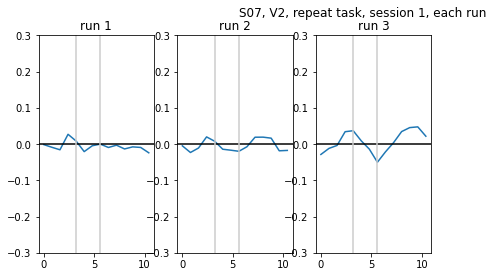

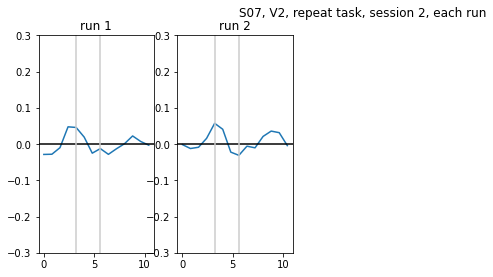

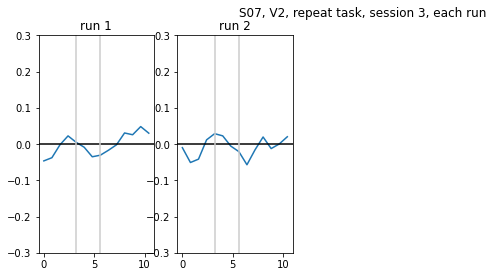

In [82]:
ri = 1;
si = 6; ss= 7;

for sess in [1,2,3]:
    
    plt.figure(figsize=(12,4))

    
    dat = repdat_all[si][ri]
    run_labs= np.array(replabs_all[si]['run_overall'])
    sess_labs = np.array(replabs_all[si]['sess'])

        
    pi=0
    for run_ind in np.unique(run_labs[sess_labs==sess]):
        
        pi+=1
        plt.subplot(1,5,pi)

        inds = (run_labs==run_ind) & (sess_labs==sess)
        if np.sum(inds)>0:
            mean_vals = np.mean(np.mean(dat[inds], axis=0), axis=1)

            plt.plot(time_axis, mean_vals)

        plt.ylim([-0.3, 0.3])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[4], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[7], color=[0.8, 0.8, 0.8])

        plt.title('run %d'%pi)
        
    plt.suptitle('S%02d, %s, repeat task, session %d, each run'%(ss, roi_names[ri], sess))

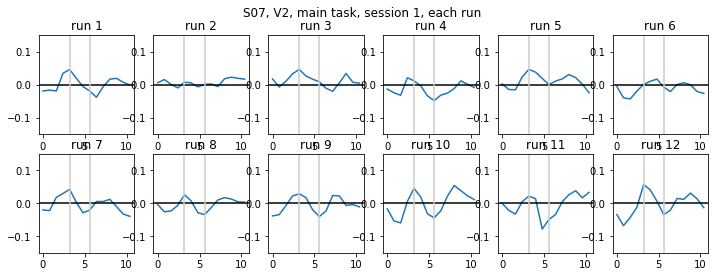

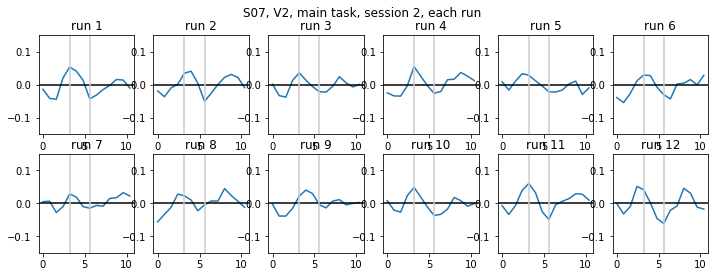

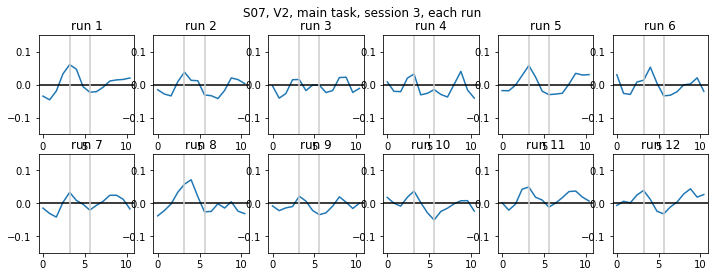

In [80]:
ri = 1;
si = 6; ss= 7;

for sess in [1,2,3]:
    
    plt.figure(figsize=(12,4))

    
    dat = maindat_all[si][ri]
    run_labs= np.array(mainlabs_all[si]['run_overall'])
    sess_labs = np.array(mainlabs_all[si]['sess'])

        
    pi=0
    for run_ind in np.unique(run_labs[sess_labs==sess]):
        
        pi+=1
        plt.subplot(2,6,pi)

        inds = (run_labs==run_ind) & (sess_labs==sess)
        if np.sum(inds)>0:
            mean_vals = np.mean(np.mean(dat[inds], axis=0), axis=1)

            plt.plot(time_axis, mean_vals)

        plt.ylim([-0.15, 0.15])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[4], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[7], color=[0.8, 0.8, 0.8])

        plt.title('run %d'%pi)
        
    plt.suptitle('S%02d, %s, main task, session %d, each run'%(ss, roi_names[ri], sess))

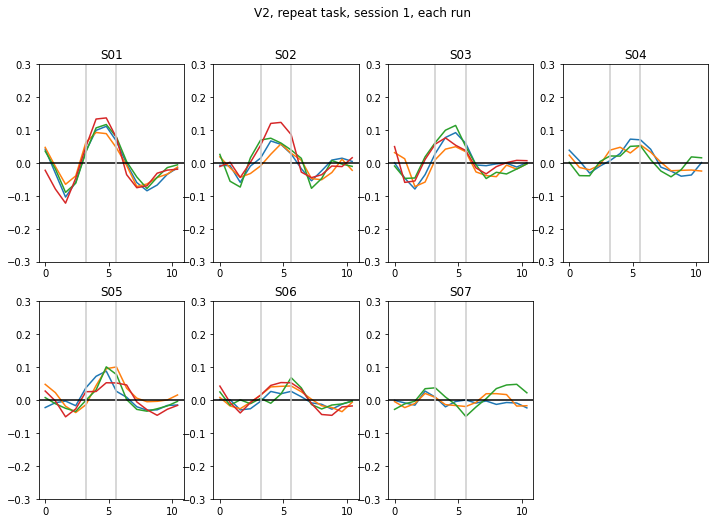

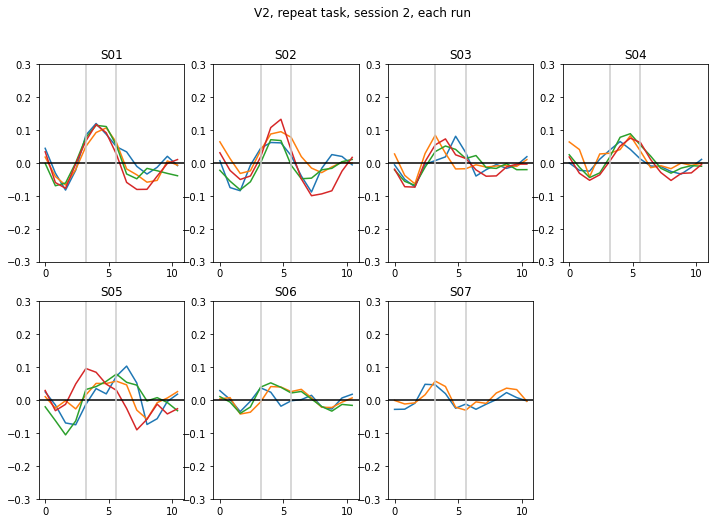

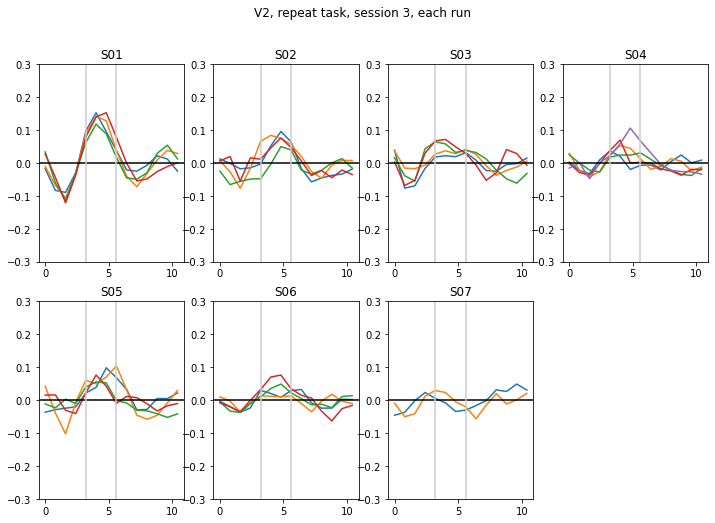

In [76]:
ri = 1;

for sess in [1,2,3]:
    

    plt.figure(figsize=(12,8))

    for si, ss in enumerate(subjects):

        dat = repdat_all[si][ri]
        run_labs= np.array(replabs_all[si]['run_overall'])
        sess_labs = np.array(replabs_all[si]['sess'])
        
        plt.subplot(2,4,si+1)

        for run_ind in np.unique(run_labs):

            inds = (run_labs==run_ind) & (sess_labs==sess)
            if np.sum(inds)>0:
                mean_vals = np.mean(np.mean(dat[inds], axis=0), axis=1)

                plt.plot(time_axis, mean_vals)

        plt.ylim([-0.3, 0.3])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[4], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[7], color=[0.8, 0.8, 0.8])
        
        plt.title('S%02d'%ss)
        
    plt.suptitle('%s, repeat task, session %d, each run'%(roi_names[ri], sess))

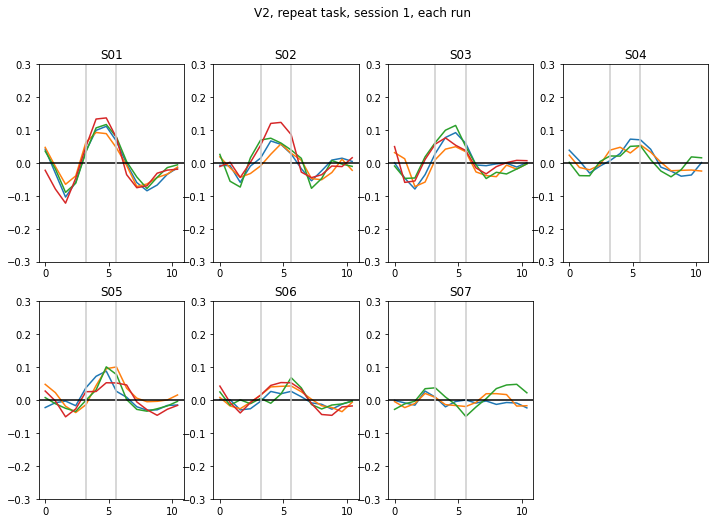

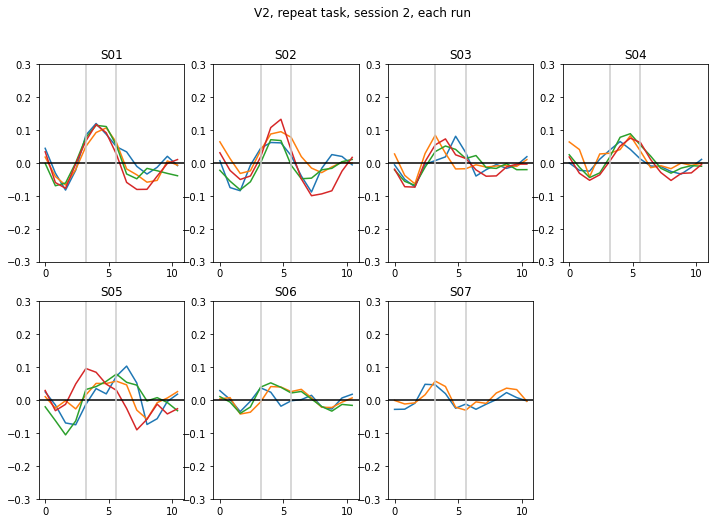

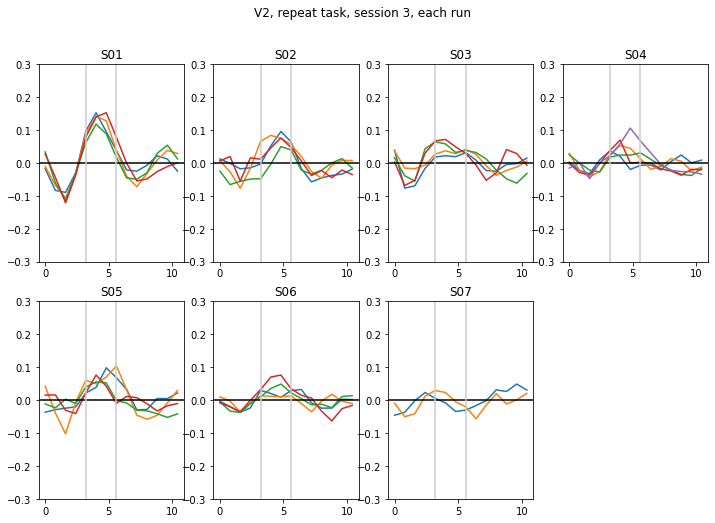

In [77]:
ri = 1;

for sess in [1,2,3]:
    

    plt.figure(figsize=(12,8))

    for si, ss in enumerate(subjects):

        dat = repdat_all[si][ri]
        run_labs= np.array(replabs_all[si]['run_overall'])
        sess_labs = np.array(replabs_all[si]['sess'])
        
        plt.subplot(2,4,si+1)

        for run_ind in np.unique(run_labs):

            inds = (run_labs==run_ind) & (sess_labs==sess)
            if np.sum(inds)>0:
                mean_vals = np.mean(np.mean(dat[inds], axis=0), axis=1)

                plt.plot(time_axis, mean_vals)

        plt.ylim([-0.3, 0.3])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[4], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[7], color=[0.8, 0.8, 0.8])
        
        plt.title('S%02d'%ss)

    plt.suptitle('%s, repeat task, session %d, each run'%(roi_names[ri], sess))

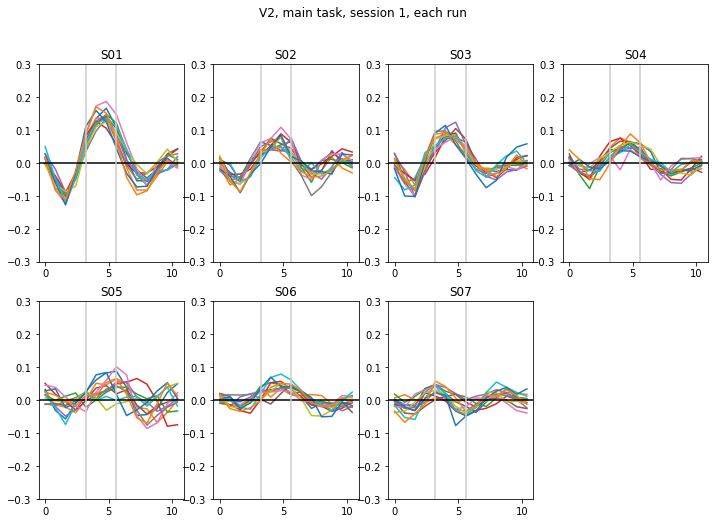

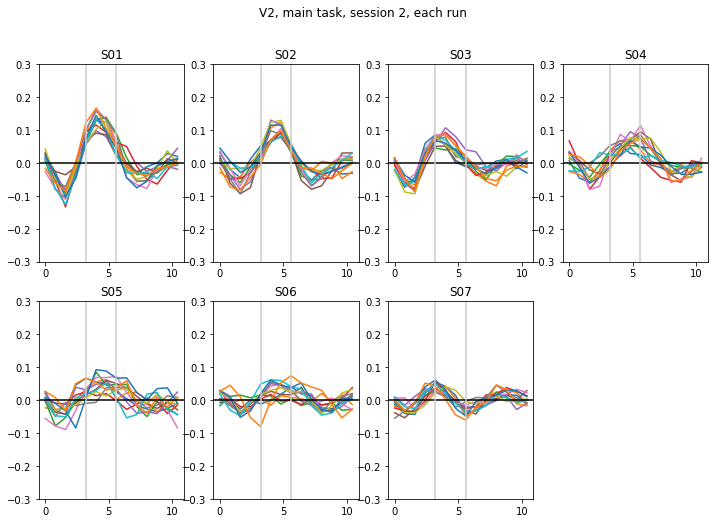

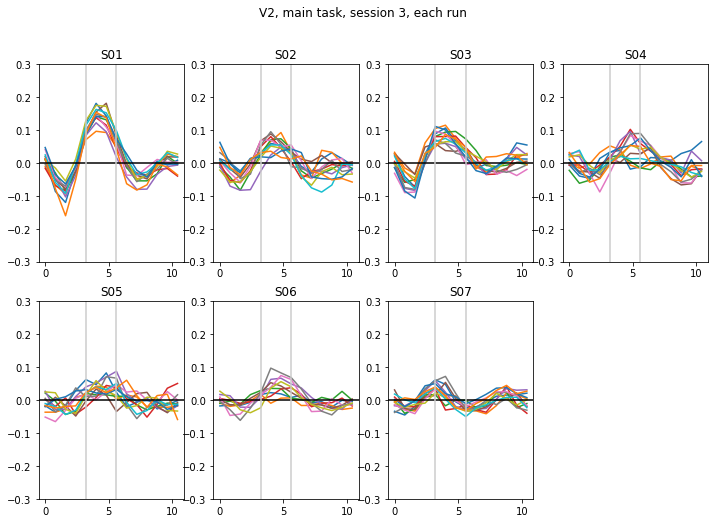

In [78]:
ri = 1;

for sess in [1,2,3]:
    

    plt.figure(figsize=(12,8))

    for si, ss in enumerate(subjects):

        dat = maindat_all[si][ri]
        run_labs= np.array(mainlabs_all[si]['run_overall'])
        sess_labs = np.array(mainlabs_all[si]['sess'])
        
        plt.subplot(2,4,si+1)

        for run_ind in np.unique(run_labs):

            inds = (run_labs==run_ind) & (sess_labs==sess)
            if np.sum(inds)>0:
                mean_vals = np.mean(np.mean(dat[inds], axis=0), axis=1)

                plt.plot(time_axis, mean_vals)

        plt.ylim([-0.3, 0.3])
        plt.axhline(0, color='k')

        plt.axvline(time_axis[4], color=[0.8, 0.8, 0.8])
        plt.axvline(time_axis[7], color=[0.8, 0.8, 0.8])
        
        plt.title('S%02d'%ss)

    plt.suptitle('%s, main task, session %d, each run'%(roi_names[ri], sess))